#STAGE 1 --> Sentence BERT for news dataset


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###Loading the Data

Load the dataset from Huggingface. We will then convert it to a dataframe.
The dataset contains the article, the highlights(short summary), and an id.

Afterwards, we will need to take the articles and make them a list in order to pass into the BERT model. In the future, try to find a way to link articles and highlights.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 780.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset
dataset = load_dataset('cnn_dailymail', '3.0.0')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
train_dataset = dataset['train']
train_df = pd.DataFrame(train_dataset)

In [ ]:
train_df.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [ ]:
#We will also create a smaller sample to test it on (so it does not take too long)
small_df = train_df.iloc[:5]

In [ ]:
articles_list = train_df['article'].tolist()

In [ ]:
articles_list_small = small_df['article'].tolist()

###The Cosine Similarity Function

In [ ]:
#We will then define a function that calculates the cosine similarities (like the L2 similarity) between them. (This is like the dot product)
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

###The SentenceBERT:

At the center of the sentenceBERT is four key concepts:

Attention
Transformer
BERT
Siamese Network sentenceBERT uses a Siamese network to provide a 2 sentence input. They are then passed through a BERT and a pooling layer to genearte their embeddings. These 2 are then used to calculate the cosine similarity.

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
#Now we will load in the pre-trained BERT model - there are actually many models avaliable.
#We are then instantiating it.

from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

###Data Visualization

In [ ]:
#Creating a small data_id list
data_id_small = train_df.iloc[0:5]['id'].tolist()

In [ ]:
"""
This is a HELPER FUNCTION that creates the plot
"""
def plot_maker (sim_list, data_id_small):
  plt.bar(data_id_small, sim_list, width=0.2)
  plt.title('Similarities')
  plt.xticks(rotation=90)
  plt.show()


In [ ]:
"""
This is a HELPER function that returns the highest sim score with its id.
"""
def highest (sim_list, data_id_small):
  x = -100
  best_index = 0
  for index, sim in enumerate(sim_list):
      if (sim > x):
        x = sim
        best_index = index
  return x, data_id_small[best_index], best_index

In [ ]:
"""
This is the MAIN FUNCTION that calculates the cosine similarity, returns the highest sim score, its id, and the plot by calling on the other two(three with cos similarity function) functions.
"""
def cos_embed(query, articles_list_small, data_id_small):
    sim_list = []
    query_vec = sbert_model.encode([query])[0]
    for sent in articles_list_small:
        sim = cosine(query_vec, sbert_model.encode([sent])[0])
        sim_list.append(sim)
    highest_sim = max(zip(sim_list, data_id_small, range(len(sim_list))))
    plot_maker(sim_list, data_id_small)
    return highest_sim, articles_list_small[highest_sim[2]]


###Getting the Quotes

Our GOAL is to generate quotes from the given article.

1. Create a list of sentences from the given article
2. Plug it into the function and inference(this is what we are doing to get the embedding).
3. Using the helper functions and with the given query, calculate the cos similarities and return the highest sim and id sentence.

For the articles:
1. We start with a dataframe with articles, summaries, and ids.
2. We then take the articles column and create a list (with iloc making it a smaller list).
3. We then take the list of articles and put it into the sentenceBERT model, where it encodes the list of articles.
4. Calculate the cosine similarity
5. Compare consine similarities and yield the highest
6. Associate it with its id and visualize.

We want to:
1. Start off with a given (highest) article
2. Break the article into sentences
3. Take the sentences and put it in a list
4. Plug the list of sentences into the sentenceBERT function and inference
5. Calculate the cos similarities
6. Compare the cos similarities and find the highest
7. Return it as a quote

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def break_articles_into_sentences(article):
  sentences = sent_tokenize(article)
  return(sentences)

In [ ]:
def sort_sentences (sentence_list):
  sentence_sim_list = []
  query1_vec = sbert_model.encode([query1])[0]
  for sent in sentence_list:
    sim = cosine(query1_vec, sbert_model.encode([sent])[0])
    sentence_sim_list.append((sim, sent))
    print(sim, sent)
  sorted_sentence_sim_list = sorted(sentence_sim_list, key=lambda x: x[0], reverse=True) #Sorting tuples with the lambda function
  return (sorted_sentence_sim_list[0:5])

###Putting it together

1. Grab articles from dataframe to list (we have a list of articles)
2. Calculate the cos similarities from the articles
3. Compare and find the highest cos similarity
__________
4. Get the highest similarity article and break it into sentences
5. Calculate the cos similarity of sentences
6. Sort the sentences
7. Return the top 5 similar sentences

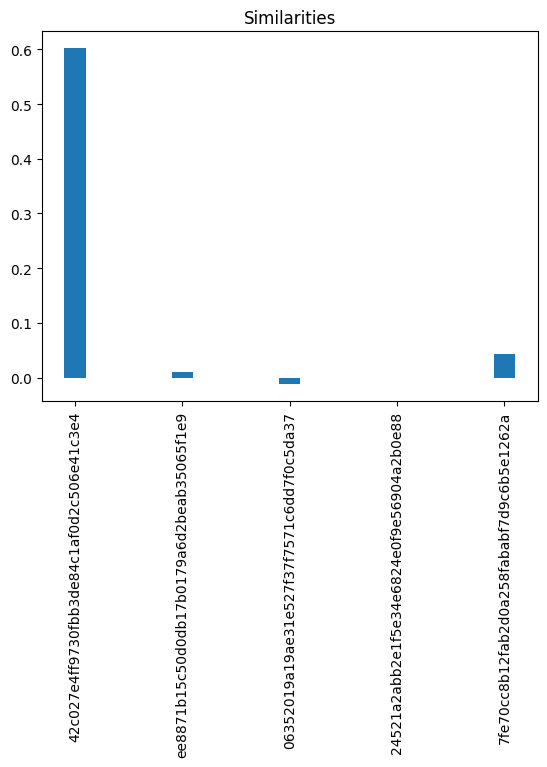

LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details of how

In [ ]:
#Now, say the user is to input a sentence into the model. We will need to find its similar codes, right?
#Let's define a test query and encode it.
query1 = "I want to know whether Daniel Radcliffe owned someone 20 million pounds. He is the lead actor in Harry Potter moives."

similarity, paragraph = cos_embed(query1, articles_list_small, data_id_small)
print(paragraph)
sentence_list = break_articles_into_sentences(paragraph)
print(sentence_list)

In [ ]:
def predict(query, articles_list_small, data_id_small):
    similarity, article = cos_embed(query, articles_list_small, data_id_small)
    sentence_list = break_articles_into_sentences(article)
    top_5 = sort_sentences(sentence_list)
    return top_5


In [ ]:
top5 = predict(query1, articles_list_small, data_id_small)

###The Final GPT Model

API Key: ...

In [ ]:
%env OPENAI_API_KEY=...

In [ ]:
!pip install openai

In [ ]:
import os
from openai import OpenAI
client = OpenAI()

In [ ]:
model_inputs = []
for idx, (sim, sentence) in enumerate(top5, start=1):
    print(f"Top {idx} Sentence: {sentence} (Similarity: {sim:.2f})")
    model_input = f"My user has asked the following question '{query1}' to which I have found this quote '{sentence}'. Provide a response which uses the direct quote to answer the question."
    model_inputs.append(model_input)

In [ ]:
message=[ {"role": "user", "content": model_input}]
temperature=0.2
max_tokens=256
frequency_penalty=0.0


response = client.chat.completions.create(
    model="gpt-4-turbo",
    messages = message,
    temperature=temperature,
    max_tokens=max_tokens,
    frequency_penalty=frequency_penalty
)

print(response)


Look into dash and plotly - look to see if you can implement an AI model on there.

Also - the model is currently saying words like 'based on the information provided.' I would much rather 'based on my current database' or 'based on my avaliable database.'

Call it DRI-C for now - maybe Datastream in the future.